# Analyse 1

We kunnen ook inzetten op 'Beide teams scoren': Ja of Nee.

We willen daar niet zomaar blindelings op inzetten maar een 'gefundeerde' keuze maken.

Als de roepnamen van 2 clubs worden gegeven, bereken dan hoe vaak de beide teams scoorden in de vroegere duels: Ja of Nee. (inclusief de percentages)

In [8]:
# De nodige imports inladen
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# Dataset inladen
wedstrijddata = pd.read_csv("D:/Hogent/Visual Studio Code/DEP/DEP1-2023-2024-groep30/transfermarkt/data/correcte_data/wedstrijden.csv", sep=";")

In [10]:
# De eerste 10 rijen van de dataset bekijken
wedstrijddata.head(10)

,Seizoen,Speeldag,Datum,Tijdstip,Id,StamnummerThuisploeg,RoepnaamThuisploeg,StamnummerUitploeg,RoepnaamUitploeg,StandThuis,StandUit
0,1960,1,1960-09-04,15:00,4008203,373,Sint-Truidense VV,16,Standard Luik,0,2
1,1960,1,1960-09-04,15:00,4008204,90,Eendracht Aalst,1,Royal Antwerp FC,3,2
2,1960,1,1960-09-04,15:00,4008205,246,Olympic Charleroi,35,RSC Anderlecht,0,7
3,1960,1,1960-09-04,15:00,4008206,13,Beerschot,33,Verviétois,1,0
4,1960,1,1960-09-04,15:00,4008207,3,Club Brugge,10,Union Saint-Gilloise,1,2
5,1960,1,1960-09-04,15:00,4008208,2,Daring Club Brussel,3434,Patro Eisden,2,1
6,1960,1,1960-09-04,15:00,4008209,4,RFC Luik,7,KAA Gent,2,1
7,1960,1,1960-09-04,15:00,4008210,553,Waterschei SV Thor,30,Lierse SK,5,0
8,1960,2,1960-09-11,15:00,4008211,16,Standard Luik,90,Eendracht Aalst,3,0
9,1960,2,1960-09-11,15:00,4008212,35,RSC Anderlecht,4,RFC Luik,2,3


In [11]:
# Analyse beide teams scoren
def analyseer_teams(data, team1, team2):
    # Filter de wedstrijden waar beide teams tegen elkaar speelden
    matches = data[((data['RoepnaamThuisploeg'] == team1) & (data['RoepnaamUitploeg'] == team2)) |
                   ((data['RoepnaamThuisploeg'] == team2) & (data['RoepnaamUitploeg'] == team1))]
    
    # Bereken het aantal matchen waar beide teams scoorden
    matches['BeideScoren'] = (matches['StandThuis'] > 0) & (matches['StandUit'] > 0)
    
    # Percentage berekenen
    if len(matches) > 0: # Als er wedstrijden gevonden zijn
        percentage_yes = matches['BeideScoren'].mean() * 100 # Percentage berekenen
        aantal_ja = matches['BeideScoren'].sum() # Aantal keer dat beide teams scoorden
        aantal_nee = len(matches) - aantal_ja # Aantal keer dat beide teams niet scoorden
        return {
            'Aantal Wedstrijden': len(matches),
            'Beide Scoren Ja': aantal_ja,
            'Beide Scoren Nee': aantal_nee,
            'Percentage Ja': percentage_yes,
            'Percentage Nee': 100 - percentage_yes
        }
    else:
        return "Geen wedstrijden gevonden tussen deze teams."

In [12]:
# Voorbeeld: Analyseer teams
resultaat = analyseer_teams(wedstrijddata, 'Club Brugge', 'Standard Luik')
print(resultaat)

{'Aantal Wedstrijden': 128, 'Beide Scoren Ja': 68, 'Beide Scoren Nee': 60, 'Percentage Ja': 53.125, 'Percentage Nee': 46.875}


C:\Users\Matteo\AppData\Local\Temp\ipykernel_8036\1715862500.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches['BeideScoren'] = (matches['StandThuis'] > 0) & (matches['StandUit'] > 0)


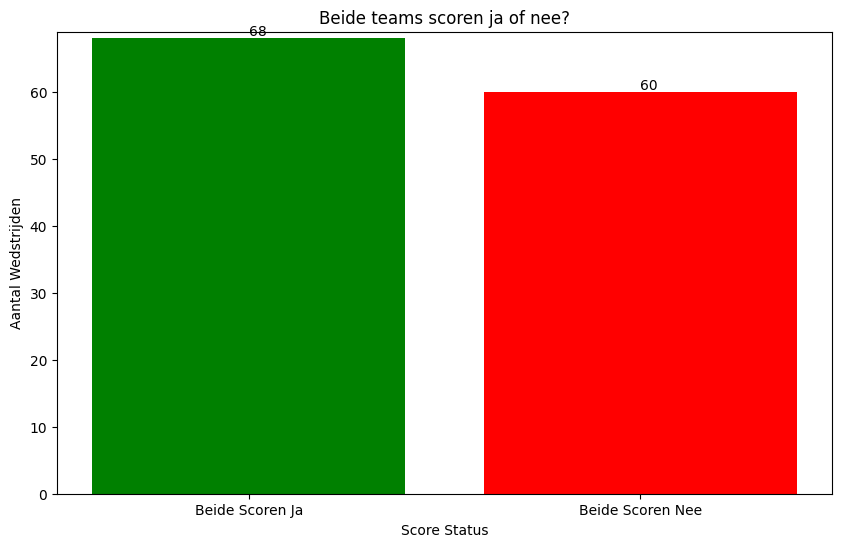

In [13]:
# Grafiek met aantal wedstrijden waar beide teams scoren
if isinstance(resultaat, dict):
    labels = ['Beide Scoren Ja', 'Beide Scoren Nee'] # X-as labels
    waarden = [resultaat['Beide Scoren Ja'], resultaat['Beide Scoren Nee']] # Y-as waarden
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(labels, waarden, color=['green', 'red']) # Maak een staafdiagram
    
    plt.title('Beide teams scoren ja of nee?') # Titel van de grafiek
    plt.xlabel('Score Status') # X-as label
    plt.ylabel('Aantal Wedstrijden') # Y-as label
    plt.ylim(0, max(waarden) + 1)  # Zorg voor voldoende ruimte boven de bars

    # Voeg numerieke labels toe boven elke staaf
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')  # Center the text vertically just above the bar

    plt.show()
else:
    print("Geen grafiek beschikbaar: " + resultaat) # Geen grafiek beschikbaar


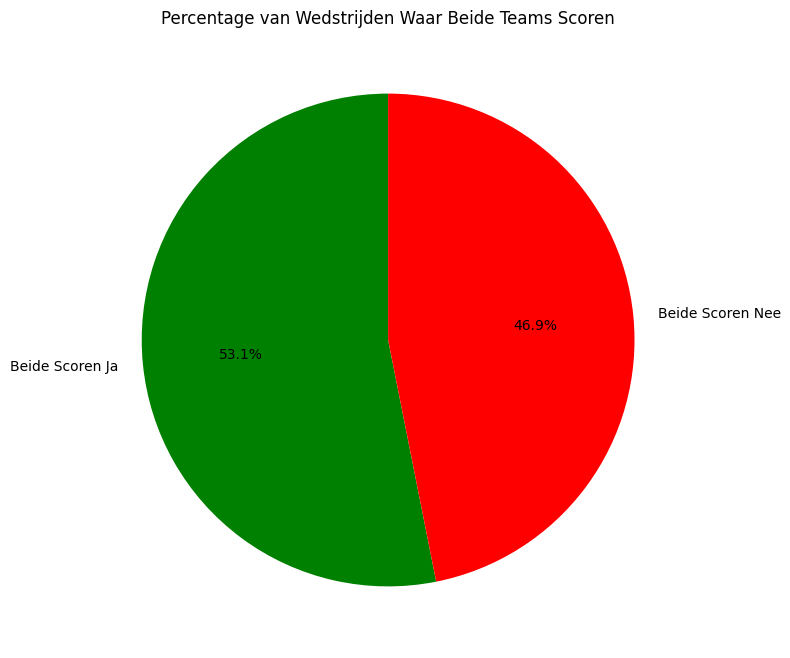

In [14]:
# Grafiek met percentages
if isinstance(resultaat, dict):
    labels = ['Beide Scoren Ja', 'Beide Scoren Nee'] # X-as labels
    percentages = [resultaat['Percentage Ja'], resultaat['Percentage Nee']] # Y-as waarden
    
    plt.figure(figsize=(8, 8))
    plt.pie(percentages, labels=labels, colors=['green', 'red'], autopct='%1.1f%%', startangle=90) # Maak een cirkeldiagram
    plt.title('Percentage van Wedstrijden Waar Beide Teams Scoren') # Titel van de grafiek

    plt.show()
else:
    print("Geen grafiek beschikbaar: " + resultaat)